# A simple Bucket Hydrology Model
## 4/9/2018
## Runga-Kutta 4 method

In [1]:
import numpy as np
import matplotlib.pyplot as plt



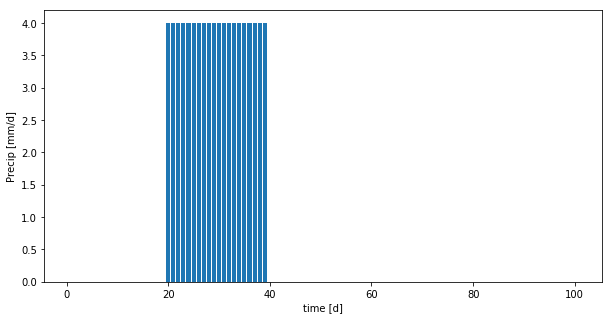

In [14]:
Nt = 100
dt = 1.0

P = np.zeros((Nt, 1))   # length Nt, width 1
P[19:39] = 4.0          # precip event from 20-40, with P = 4.0

t = np.arange(1, Nt+1, 1)

plt.figure(1)
plt.figure(figsize=(10,5)) 
plt.bar(t, P)
plt.ylabel('Precip [mm/d]')
plt.xlabel('time [d]')
plt.show()



In [17]:
# define parameters

k1 = 0.02      # drainage coeff. units [day^-1]
W1_0 = 250.0   # Storage --> units [mm]

# initialize W1 w/zeros for computing  -> data container for our water storage at each time step
W1 = np.zeros(t.shape)   # this is where we will put our answers


# update initial condition
W1[0] = W1_0

# initialize a data container for discharge at each time step
Q = np.zeros(t.shape)

# update initial condition
Q[0] = k1*W1[0]

# the main loop  --> start at timestep 1, go to end

for i in np.arange(1, Nt, 1):    # start at 1, go to Nt, by step of 1
    # compute value of derivatives
    dw1dt = P[i-1] - k1*W1[i-1]
    
    # Compute the next value of W
    W1[i] = W1[i-1] + dw1dt*dt
    
    # Compute the next value of Q
    Q[i] = k1*W1[i]
    
    

(100,)


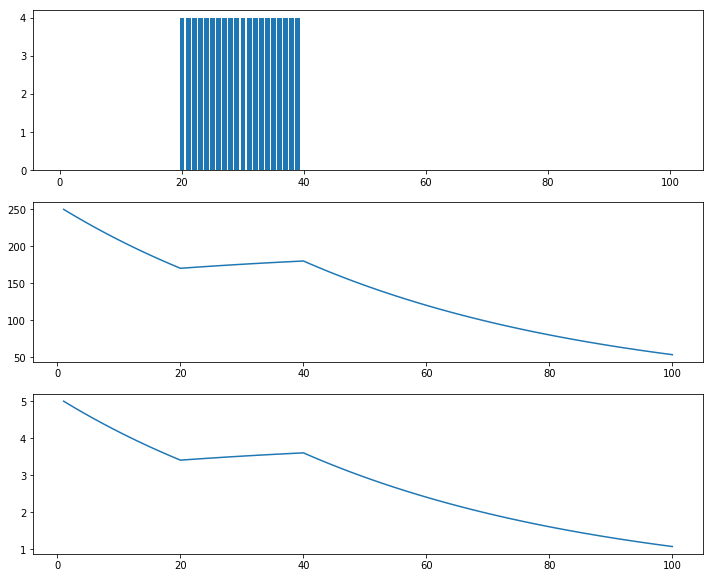

In [22]:
print(W1.shape)

plt.figure(2)
plt.figure(figsize=(12,10)) 
plt.subplot(311)
plt.bar(t, P)
plt.subplot(312)
plt.plot(t, W1)
plt.subplot(313)
plt.plot(t, Q)
plt.show()